# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

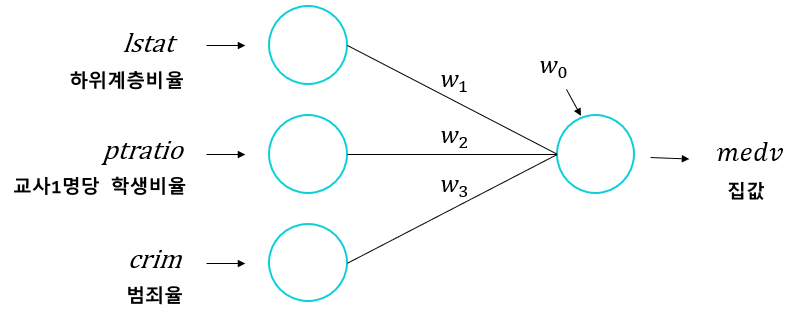

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [ ]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [ ]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [ ]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 
model = Sequential( Dense(1, input_shape = (nfeatures,)) )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(lr = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.1), loss='mse')

### (2) 학습

* validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [ ]:
history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/20
11/11 [==============================] - 1s 31ms/step - loss: 571.5110 - val_loss: 577.0120
Epoch 2/20
11/11 [==============================] - 0s 8ms/step - loss: 489.2647 - val_loss: 499.1079
Epoch 3/20
11/11 [==============================] - 0s 11ms/step - loss: 418.2319 - val_loss: 432.6833
Epoch 4/20
11/11 [==============================] - 0s 11ms/step - loss: 359.0570 - val_loss: 377.7811
Epoch 5/20
11/11 [==============================] - 0s 7ms/step - loss: 309.7421 - val_loss: 332.4446
Epoch 6/20
11/11 [==============================] - 0s 7ms/step - loss: 270.8658 - val_loss: 296.9759
Epoch 7/20
11/11 [==============================] - 0s 6ms/step - loss: 240.5217 - val_loss: 270.1676
Epoch 8/20
11/11 [==============================] - 0s 12ms/step - loss: 218.4201 - val_loss: 249.3737
Epoch 9/20
11/11 [==============================] - 0s 7ms/step - loss: 200.8222 - val_loss: 233.2946
Epoch 10/20
11/11 [==============================] - 0s 10ms/step - loss: 187.

* 학습결과 그래프

In [ ]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

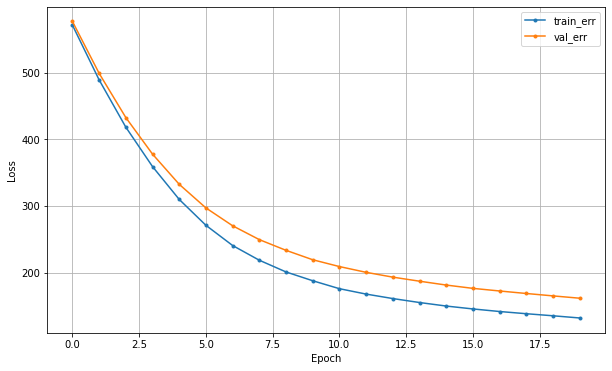

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증

In [ ]:
pred = model.predict(x_val)

4/4 [==============================] - 0s 3ms/step


In [ ]:
# DL
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 9.736400547474847
MAE  : 6.525321562149946
MAPE : 0.3475142817156303


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential( Dense(1, input_shape = (nfeatures,)) )

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


* compile

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

* 학습

In [ ]:
history = model2.fit(x_train, y_train, epochs = 10
                     , validation_split=0.2).history

Epoch 1/100
11/11 [==============================] - 0s 13ms/step - loss: 490.6626 - val_loss: 357.1344
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 324.0320 - val_loss: 234.5844
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 226.7588 - val_loss: 169.6876
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 178.5136 - val_loss: 139.7732
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 158.1483 - val_loss: 125.3238
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 145.0906 - val_loss: 115.0840
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 133.9107 - val_loss: 105.2107
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 123.0454 - val_loss: 96.8417
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 113.4652 - val_loss: 88.9418
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 

* 학습결과 그래프

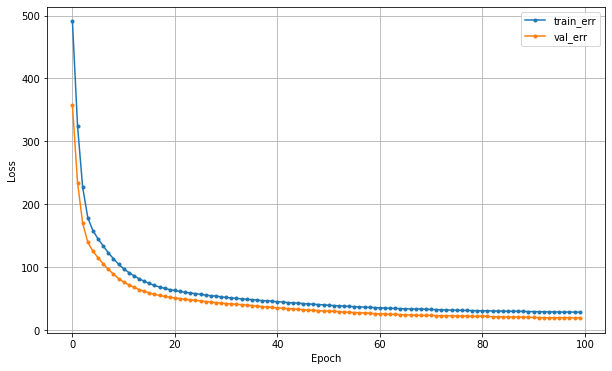

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred2 = model2.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 [==============================] - 0s 4ms/step
RMSE : 5.609005959551959
MAE  : 4.2740623399323106
MAPE : 0.2545335638554699


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율) 
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model2 = Sequential( Dense(1, input_shape = (nfeatures,)) )

# 모델요약
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


* compile

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

* 학습

In [ ]:
history = model2.fit(x_train, y_train, epochs = 100
                     , validation_split=0.2).history

Epoch 1/100
11/11 [==============================] - 0s 13ms/step - loss: 490.6626 - val_loss: 357.1344
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 324.0320 - val_loss: 234.5844
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 226.7588 - val_loss: 169.6876
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 178.5136 - val_loss: 139.7732
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 158.1483 - val_loss: 125.3238
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 145.0906 - val_loss: 115.0840
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 133.9107 - val_loss: 105.2107
Epoch 8/100
11/11 [==============================] - 0s 4ms/step - loss: 123.0454 - val_loss: 96.8417
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 113.4652 - val_loss: 88.9418
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 

* 학습결과 그래프

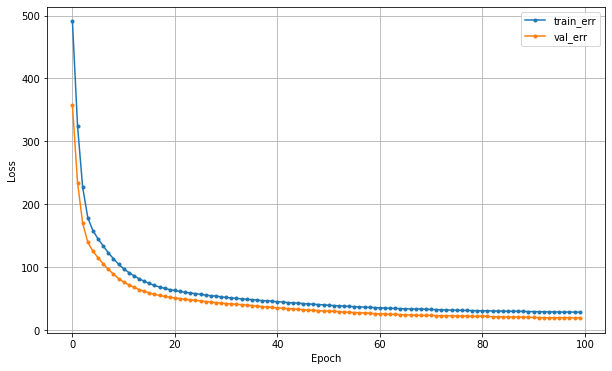

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred2 = model2.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred2, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred2)}')

4/4 [==============================] - 0s 4ms/step
RMSE : 5.609005959551959
MAE  : 4.2740623399323106
MAPE : 0.2545335638554699


----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model3 = Sequential([Dense(2, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(1)])

# 모델요약
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 26        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


* compile

In [ ]:
model3.compile(optimizer=Adam(learning_rate = 0.1), loss='mse')

* 학습

In [ ]:
history = model3.fit(x_train, y_train
                     , epochs = 100
                     , validation_split=0.2).history

Epoch 1/100
11/11 [==============================] - 0s 13ms/step - loss: 411.4190 - val_loss: 140.2735
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 154.9937 - val_loss: 101.3474
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 104.8833 - val_loss: 72.4313
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 75.3465 - val_loss: 63.2685
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 66.8043 - val_loss: 54.5544
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 58.9030 - val_loss: 49.5300
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 52.4002 - val_loss: 42.6209
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 47.4055 - val_loss: 36.7673
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 42.9915 - val_loss: 32.3200
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 38.8792 - v

* 학습결과 그래프

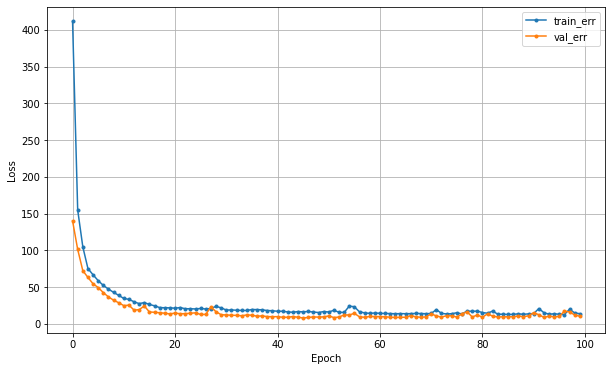

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred3 = model3.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred3)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred3)}')

4/4 [==============================] - 0s 3ms/step
RMSE : 5.24773288420523
MAE  : 3.290436108907063
MAPE : 0.17238244473583764


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 112 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(1)])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


* 컴파일 + 학습

In [ ]:
model.compile(optimizer=Adam(lr=0.05), loss='mse')

history = model.fit(x_train, y_train
                     , epochs = 100
                     , validation_split=0.2).history

* 학습곡선

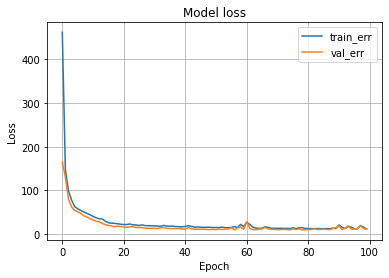

In [ ]:
dl_history_plot(history)

* 검증

In [ ]:
pred = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')

RMSE : 5.317726755624473
MAE  : 3.127618623247333


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 112 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(4, activation = 'relu'),
                    Dense(1)])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


* 컴파일 + 학습

In [ ]:
epochs = 100
batch_size = 32
model.compile(optimizer=Adam(lr=0.05), loss='mse')

history = model.fit(x_train, y_train
                     , epochs = epochs
                     , batch_size=batch_size
                     , validation_split=0.2).history

* 학습곡선

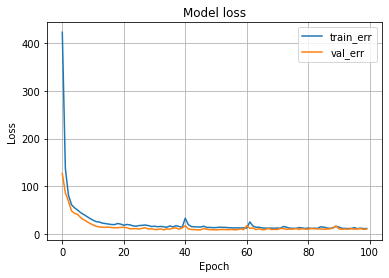

In [ ]:
dl_history_plot(history)

* 검증

In [ ]:
pred = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')

RMSE : 5.042903996399015
MAE  : 2.980601177963555


### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.


In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(20, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(4, activation = 'relu'),
                    Dense(1)])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 8)                 168       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


* 컴파일 + 학습

In [ ]:
epochs = 100
batch_size = 32
model.compile(optimizer=Adam(lr=0.05), loss='mse')

history = model.fit(x_train, y_train
                     , epochs = epochs
                     , batch_size=batch_size
                     , validation_split=0.2).history

* 학습곡선

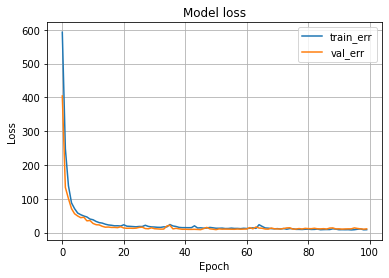

In [ ]:
dl_history_plot(history)

* 검증

In [ ]:
pred = model.predict(x_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')

RMSE : 4.8410425649631215
MAE  : 2.9306203898261574
